# Stance Detection

In [31]:
import numpy as np
import sys

sys.path.insert(1,"../")
from new_util import DataLoader
from preprocess import Preprocess
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt


In [32]:

dataloader = DataLoader()

head,stances,body = dataloader.dataset()
len(head) == len(stances) == len(body)

True

In [33]:
  

# i dont like this 
def encoder(stance):
    if stance == "agree":
        return 0
    elif stance == "disagree":
        return 1
    elif stance == "discuss":
        return 2
    elif stance == "unrelated":
        return 3
    else:
        raise

def one_hot(stance):
    st_id = encoder(stance) # beter code
    zeros = np.zeros(4)
    zeros[st_id] = 1
    return zeros
   
labels = [list(one_hot(i)) for i in stances] 

In [34]:
print(labels[0])
print(stances[0])

[0.0, 0.0, 0.0, 1.0]
unrelated


In [35]:
pre = Preprocess()   # Glove embedding   
pre.parse()  

In [36]:
print(pre.embeddings_dict["python"])  
    

[ 0.5897   -0.55043  -1.0106    0.41226   0.57348   0.23464  -0.35773
 -1.78      0.10745   0.74913   0.45013   1.0351    0.48348   0.47954
  0.51908  -0.15053   0.32474   1.0789   -0.90894   0.42943  -0.56388
  0.69961   0.13501   0.16557  -0.063592  0.35435   0.42819   0.1536
 -0.47018  -1.0935    1.361    -0.80821  -0.674     1.2606    0.29554
  1.0835    0.2444   -1.1877   -0.60203  -0.068315  0.66256   0.45336
 -1.0178    0.68267  -0.20788  -0.73393   1.2597    0.15425  -0.93256
 -0.15025 ]


In [37]:
# strip out commas and unimportant words

def representation(data):
    pre_data = []
    for i in tqdm(data):
        words = []
        
        sep = i.split(" ")
        for s in sep:
            try:
                
                emb = pre.embeddings_dict[s.lower().replace("'","").replace(",","").replace("$15/","")]
                words.append(emb)

            except KeyError:
                pass
                #head_words.append()
        if words != []:
            
            pre_data.append(np.array(words))
   
    #return [x for x in pre_data if x != []]
    return pre_data 

In [38]:
head_output = representation(head[2])
body_output = representation(body[1])

In [39]:
# check if the list have an empty list

val = 0
for i in head_output:
    
    try:
        i[0]
        pass
    except IndexError:
        
        val+=1
        
print(val)

0


In [61]:
#single head output
head_output = np.array(head_output).reshape(74,50)

In [70]:
# positional encoding from https://robelkebede.github.io/2020/11/06/positional-encoding.html

def pos_enc(word_emb,pos):
    
    word_pos,word_emb = [],np.array([i for i in word_emb],dtype=np.float64)
    
    for i in range(len(word_emb)):
        k = 2*i / len(word_emb)
        
        if i%2 == 0:
            word_pos.append(np.sin(pos/(1000**k)))
        else:
            word_pos.append(np.cos(pos/(1000**k)))
            
   
    return  word_emb +word_pos
    

x1 = np.array([pos_enc(val,i) for i,val in enumerate(head_output)])


In [71]:
%matplotlib inline

In [74]:
# single positional encoding
x1 = x1.reshape(74,50)


Text(0.5, 1.0, 'after position encoding')

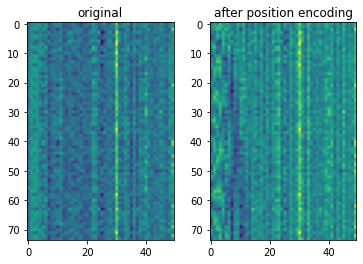

In [77]:
fig,ax = plt.subplots(1,2)

ax[0].imshow(og)
ax[1].imshow(x1)

ax[0].set_title("original")
ax[1].set_title("after position encoding")